In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.datasets import FashionMNIST
from torchvision import transforms

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
train_dataset = FashionMNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = FashionMNIST(root='data', train=False, download=True, transform=transforms.ToTensor())

batch_size = 64

train_loader= DataLoader(train_dataset, batch_size = batch_size)
test_loader = DataLoader(test_dataset, batch_size = batch_size)

In [12]:
csv_train = pd.read_csv('data/fashion-mnist_train.csv')
csv_test = pd.read_csv('data/fashion-mnist_test.csv')

Exploratory Data Analysis

In [36]:
#Classes:
classes = train_dataset.classes
classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [14]:
csv_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each dataframe is class (from 0 to 9) and 28*28 monohrome pixels.

Amount of dataframes in train, test datasets

In [24]:
print("Train dataset size:", len(csv_train))
print("Test dataset size:", len(csv_test))

Train dataset size: 60000
Test dataset size: 10000


In [10]:
def show_image(dataset: FashionMNIST, index: int):
    figure = plt.figure(figsize = (5,5))
    image, label = dataset[index]
    plt.title(dataset.classes[label])
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
    plt.show()
    

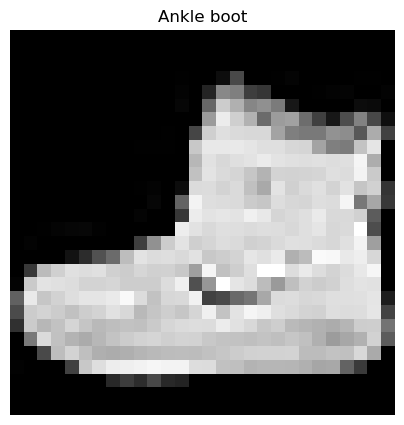

In [11]:
#Example of image
show_image(train_dataset, 0)

Class distribution

In [46]:
def get_classes_distribution(frames: pd.DataFrame, classes: list[str]):
    value_counts = frames['label'].value_counts()
    total_amount = len(frames)
    for i in range(len(value_counts)):
        label = classes[value_counts.index[i]]
        amount = value_counts.values[i]
        percentage = amount * 100 / total_amount
        print("#{} {:<15s}:   {} or {}%".format(value_counts.index[i], label, amount, percentage))


In [47]:
get_classes_distribution(csv_train, classes)


#2 Pullover       :   6000 or 10.0%
#9 Ankle boot     :   6000 or 10.0%
#6 Shirt          :   6000 or 10.0%
#0 T-shirt/top    :   6000 or 10.0%
#3 Dress          :   6000 or 10.0%
#4 Coat           :   6000 or 10.0%
#5 Sandal         :   6000 or 10.0%
#8 Bag            :   6000 or 10.0%
#7 Sneaker        :   6000 or 10.0%
#1 Trouser        :   6000 or 10.0%
